# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

Note that the files we're working with here are from 2021. Baptist Health has since changed the file format.  This won't work correctly if you try to do it with files downloaded from the website above. It will only work with these files.

---
---

### 41.1 Loading and viewing the data

Here is URL to sample file for Baptist Health:
* https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx'

data = pd.read_excel(url, sheet_name='Sheet1', skiprows=3)

In [42]:
data.shape

(3864, 19)

In [43]:
data.columns

Index(['Location', 'Code Type', 'Code', 'NDC', 'Rev Code', 'Procedure',
       'Procedure Description', 'Quantity', 'Payer', 'IP Charge',
       'IP Expected Reimbursement', 'MIN_IP_XR', 'MAX_IP_XR', 'IP Cash Price',
       'OP Charge', 'OP Expected Reimbursement', 'MIN_OP_XR', 'MAX_OP_XR',
       'OP Cash Price'],
      dtype='object')

In [44]:
data.head()

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
0,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 013,NaN,NaN,MS013,"Tracheostomy For Face, Mouth And Neck Diagnose...",1,AETNA [65000],59006.00,31705.95,11936.11,31705.95,15341.56,0,NaN,NaN,NaN,NaN
1,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 022,NaN,NaN,MS022,Intracranial Vascular Procedures With Principa...,1,AETNA [65000],61399.00,61399.00,15963.74,61399.00,15963.74,0,NaN,NaN,NaN,NaN
2,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 024,NaN,NaN,MS024,Craniotomy With Major Device Implant Or Acute ...,1,AETNA [65000],72401.56,NaN,7770.00,23719.14,18824.41,0,NaN,NaN,NaN,NaN
3,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 025,NaN,NaN,MS025,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],76565.21,57449.30,7770.00,57449.30,19906.95,0,NaN,NaN,NaN,NaN
4,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 026,NaN,NaN,MS026,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],64748.06,29999.01,2913.75,29999.01,16834.50,0,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

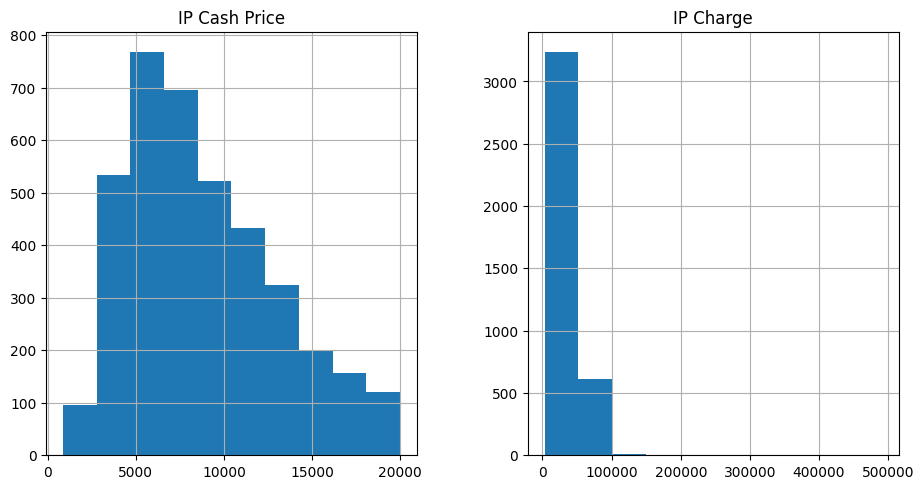

In [45]:
data[['IP Cash Price','IP Charge']].hist(figsize=(11,5.5))

array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

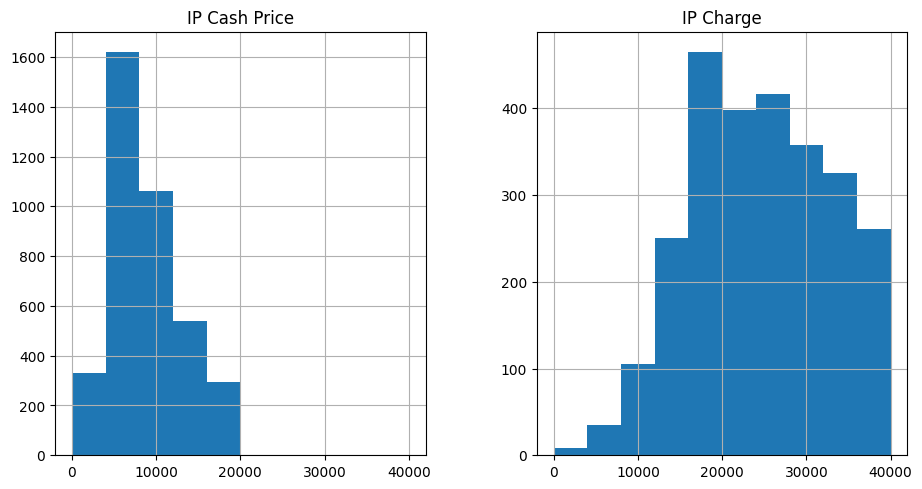

In [46]:
data[['IP Cash Price','IP Charge']].hist(range=[0,40000], figsize=(11,5.5))

In [47]:
high_cost_filter = data['IP Charge'] > 100000
data.loc[high_cost_filter]

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
800,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ALLWELL [15100],120026.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
858,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ALLWELL [15100],102435.46,16684.09,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
934,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 461,NaN,NaN,MS461,Bilateral Or Multiple Major Joint Procedures O...,1,ALLWELL [15100],121126.29,NaN,8741.25,9225.00,NaN,0,NaN,NaN,NaN,NaN
1171,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 802,NaN,NaN,MS802,Other O.R. Procedures Of The Blood And Blood F...,1,ALLWELL [15100],143667.09,NaN,9725.00,10204.12,10204.12,0,NaN,NaN,NaN,NaN
1264,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 939,NaN,NaN,MS939,O.R. Procedures With Diagnoses Of Other Contac...,1,ALLWELL [15100],480809.48,NaN,7790.37,7790.37,7790.37,0,NaN,NaN,NaN,NaN
1945,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 037,NaN,NaN,MS037,Extracranial Procedures With McC,1,ARKANSAS TOTAL CARE [40700],123035.47,NaN,17816.08,39275.00,17816.08,0,NaN,NaN,NaN,NaN
2091,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ARKANSAS TOTAL CARE [40700],121981.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2138,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 333,NaN,NaN,MS333,Rectal Resection With Cc,1,ARKANSAS TOTAL CARE [40700],128929.41,NaN,12824.58,26704.23,15975.34,0,NaN,NaN,NaN,NaN
2149,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ARKANSAS TOTAL CARE [40700],104304.46,NaN,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
2192,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 408,NaN,NaN,MS408,Biliary Tract Procedures Except Only Cholecyst...,1,ARKANSAS TOTAL CARE [40700],108898.78,NaN,19861.16,22240.28,19861.16,0,NaN,NaN,NaN,NaN


### Question:

**What do you observe from the histograms above?**

These two histograms for "IP Cash Price" and "IP Charge" show some amazing differences in the distribution variability for these two variables across these two different datasets.

First Image:

"IP Cash Price" : It is highly right-skewed since it lies mostly below 20,000 and then falls dramatically as the prices go high.
IP Charge" right: This set of values is more dispersed than in the "IP Cash Price"; the majority of charges range between 10,000 and 40,000. Right-skewed, but much less extreme than in "IP Cash Price."

Second Picture:

"IP Cash Price" - Left: This plot is like the first, which the values for this are bunched up around the low ranges-mostly below 10,000-but this distribution is narrower compared to the first image.
"IP Charge" (right) This distribution is much more spread out, with most of it falling below 100,000. Several extreme values range upwards as high as 500,000, indicating that the right tail of this distribution has some rather large values in it.

On the whole, both distributions are right-skewed. The spread and concentration in the data differ in them; the "IP Cash Price" has less of a range in comparison to "IP Charge, which includes higher charges and points of extreme, especially in the second image.


---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

(0.0, 40000.0)

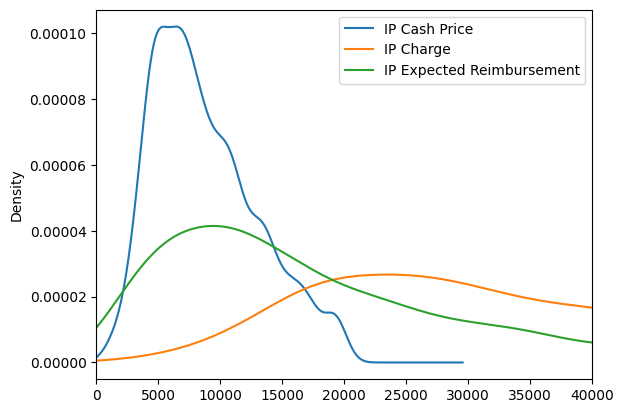

In [48]:

graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

IP Cash Price: This is the amount you pay when out-of-pocket and, usually, the lowest. The high peak of this graph simply suggests that most self-pay prices are relatively not too high; few go above 10,000. Discounts may be given by hospitals when one pays on his own, hence the reason these prices are lower.

IP Charge: This is the maximum amount that the hospital says it can bill to an insurance company. It's set high, possibly in order to give room for negotiation between the hospital and insurance companies. You can see this because the "IP Charge" curve is spread out and values go much higher than the self-pay prices.

Anticipated Insurance Reimbursement: This is what the hospital actually expects to get from insurance companies after some negotiations. This amount usually lands between the cash price and the high "charge" price. Most of them go up to about 10,000, which tells you that figure is one of the more common amounts that hospitals receive from an insurer.


The lowest rate is for people paying cash without insurance.
A higher "charge" rate is used to bill insurance, but it's really just a starting point for negotiations.
The "expected reimbursement" shows what the hospital actually expects to be paid after negotiating with the insurance company.
Immediately, this shows a wide gulf between high charges and the real payments. For the insured patients, this very often means they are not really paying this full billed amount; insurance would then cover a negotiated rate more reasonable. This gives good insight into how complex health care prices can be and explains why insurance so often plays such a big role in making their cost less expensive for the patient.

---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [49]:
data['Payer'].value_counts()

,count
Payer,
ALLWELL [15100],650
ARKANSAS TOTAL CARE [40700],650
AETNA [65000],641
AR BLUE CROSS BLUE SHIELD [25001],641
HEALTHSCOPE [95700],641
MULTIPLAN,641


In [50]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

,IP Expected Reimbursement
Payer,
AETNA [65000],372
ALLWELL [15100],519
AR BLUE CROSS BLUE SHIELD [25001],450
ARKANSAS TOTAL CARE [40700],404
HEALTHSCOPE [95700],641
MULTIPLAN,641


,IP Expected Reimbursement
Payer,
AETNA [65000],"Axes(0.125,0.11;0.775x0.77)"
ALLWELL [15100],"Axes(0.125,0.11;0.775x0.77)"
AR BLUE CROSS BLUE SHIELD [25001],"Axes(0.125,0.11;0.775x0.77)"
ARKANSAS TOTAL CARE [40700],"Axes(0.125,0.11;0.775x0.77)"
HEALTHSCOPE [95700],"Axes(0.125,0.11;0.775x0.77)"
MULTIPLAN,"Axes(0.125,0.11;0.775x0.77)"


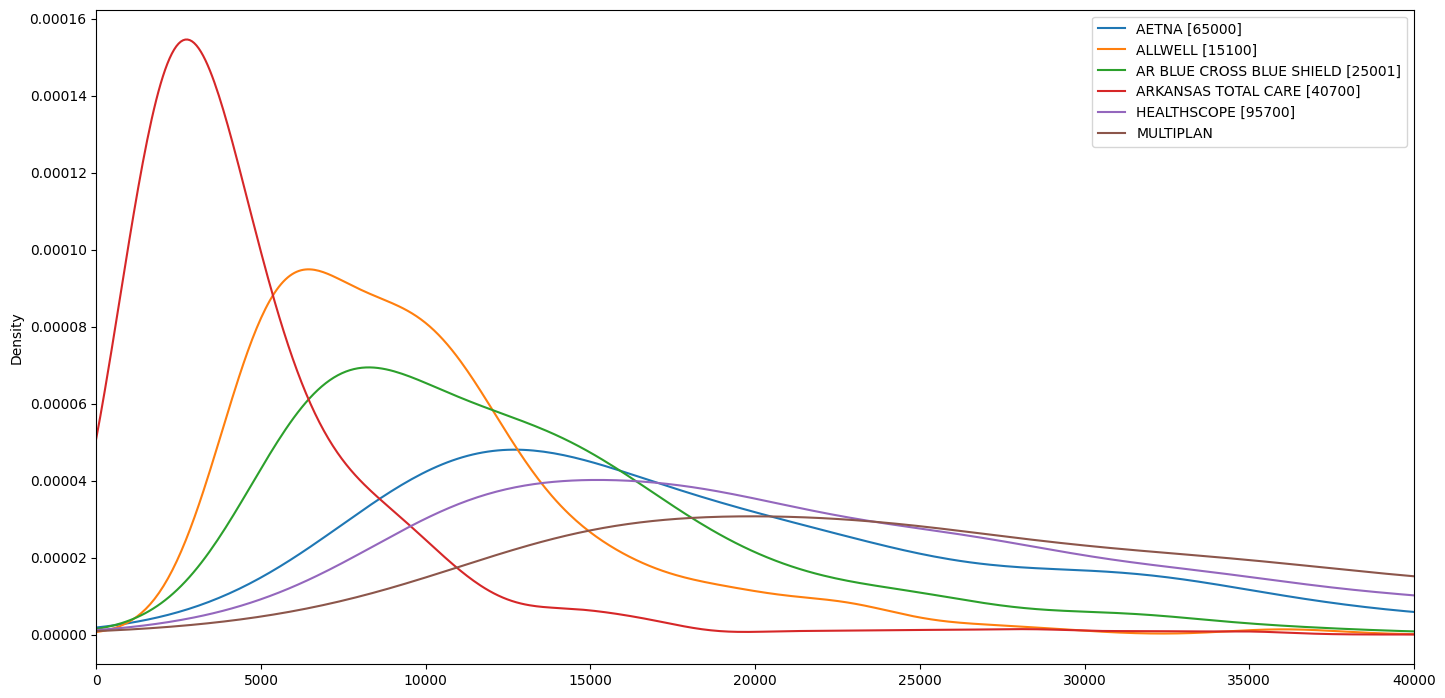

In [51]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


ARKANSAS TOTAL CARE (Red) goes to the highest peak and furthest to the left, meaning most of its reimbursement records come in at a lower price, making it the plan with the lowest typical reimbursement amount.

ALLWELL has its peak over to the left as well, but just a bit to the right of ARKANSAS TOTAL CARE, suggesting that ALLWELL generally reimburses a bit more than ARKANSAS TOTAL CARE, yet still lower compared to most of the other plans.

In AR BLUE CROSS BLUE SHIELD, it is slightly shifted to the right compared to their position of the two above, meaning mid-range typical reimbursements.

AETNA (Blue) goes furthest to the right, higher in comparison to reimbursements with ARKANSAS TOTAL CARE, ALLWELL, and AR BLUE CROSS BLUE SHIELD.

HEALTHSCOPE insurance-colored purple-peaks furthest to the right, generally higher in reimbursement in comparison to the aforementioned plans.

MULTIPLAN's (Brown's) curve is flatter and lower than the others, extending further to the right. This flat curve with no pronounced peak suggests that MULTIPLAN's reimbursements are spread over a wider range, some going far higher than the other plans.

Summary\


The positioning and shape of each line reflect how much each insurance plan commonly reimburses. Plans like ARKANSAS TOTAL CARE and ALLWELL provide reimbursements in lower amounts, while in MULTIPLAN, a wide range allows for higher reimbursements. From this pattern, it may be told that each different plan has set different negotiation standards or agreements within the healthcare providers, some of which constantly have to reimburse lower amounts and others offer a wider and generally higher range of reimbursement amount.


---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

<Axes: xlabel='IP Charge', ylabel='IP Expected Reimbursement'>

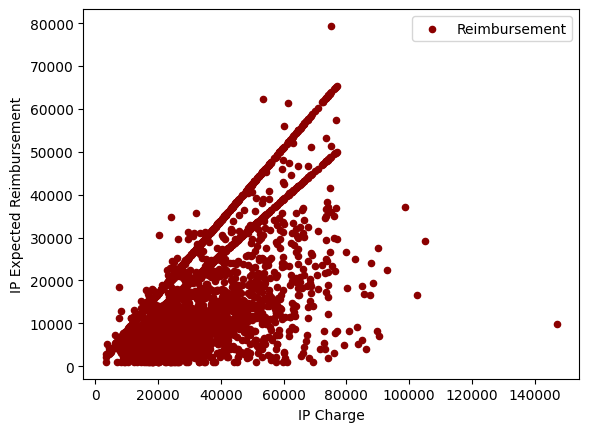

In [52]:
data.plot.scatter(x='IP Charge', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

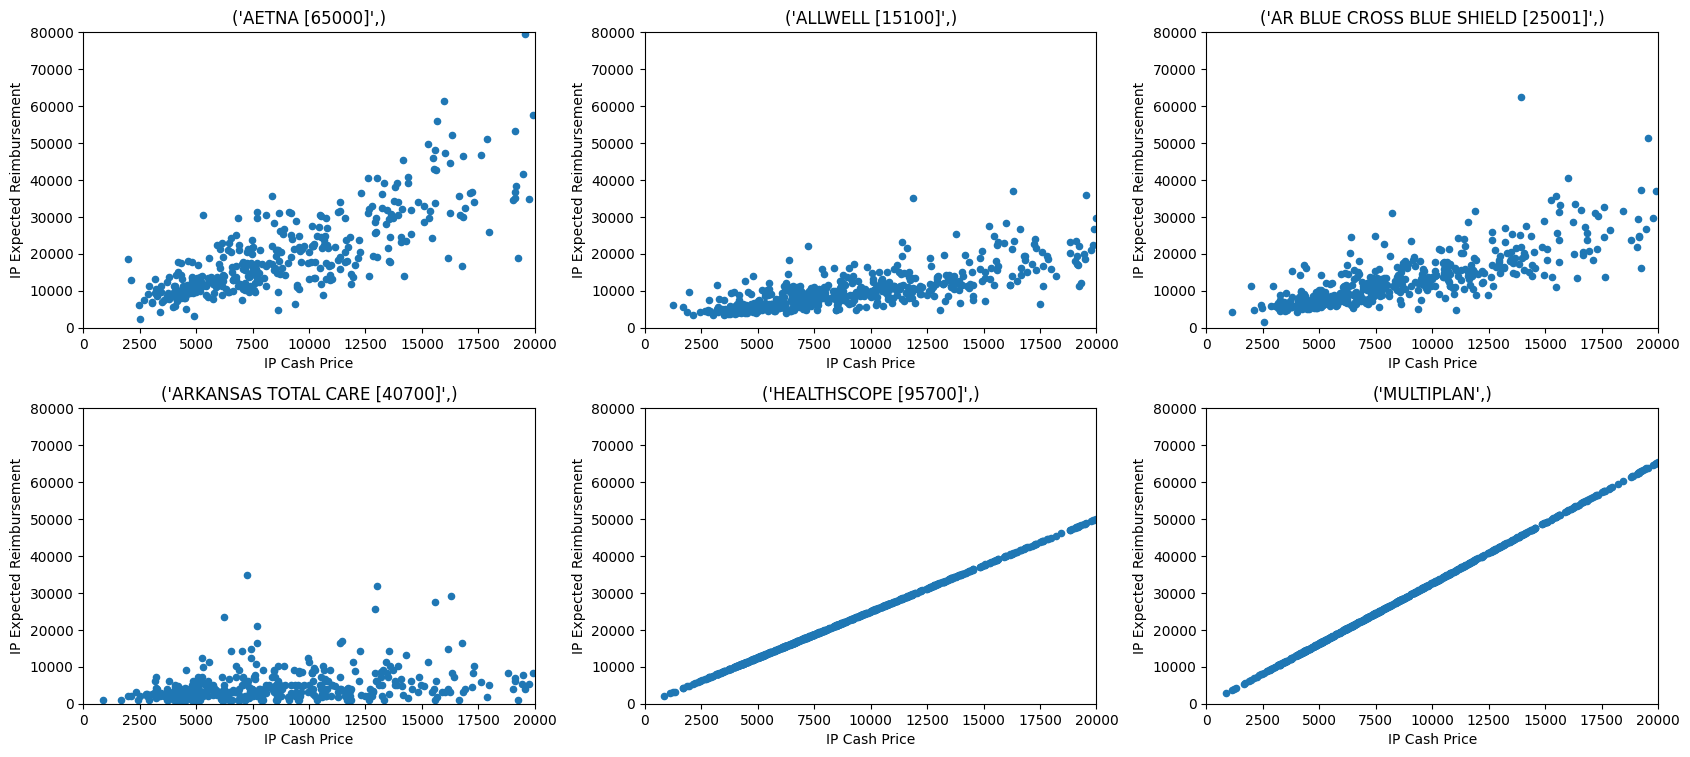

In [53]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

Scatterplot on the Relationship between Cash Prices and Insurance Reimbursements

The scatterplot will be an effective means of showing the relationship between cash price and insurance-paid amounts. In a scatterplot, one variable goes on the x-axis, for example, IP Cash Price, and the other on the y-axis, for example, IP Expected Reimbursement, in order to develop some sort of visual that may show the trend or pattern in these values that could indicate a relationship between them.

The scatterplot helps to indicate whether there is a linear relationship where higher cash prices would maybe correspond with a higher insurance reimbursement amount. This correlation can provide insight into the structure of the pricing and the consistency of reimbursement rates across payors in health care pricing and reimbursement.

Each of the subplot series from below corresponds with a specific insurance provider, so a comparison across different providers can be observed. A few providers exhibit a welldefined upward trend, showing a very strong relationship between cash price and expected reimbursement. Some others are more variable, suggesting that the line may be affected by factors other than cash price.

Such visualizations are really important in an attempt to explore the dynamics of healthcare costs and understand how different insurance companies handle reimbursements in relation to the listed cash price.

---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [54]:

from google.colab import files
uploaded = files.upload()

Saving 710236856_bhmc-lr_standardcharges.csv to 710236856_bhmc-lr_standardcharges (1).csv


In [62]:
import pandas as pd
from io import BytesIO
for filename in uploaded.keys():

    data = pd.read_csv(BytesIO(uploaded[filename]), encoding='ISO-8859-1')
    print(f"Loaded {filename} successfully.")


Loaded 710236856_bhmc-lr_standardcharges (1).csv successfully.


<ipython-input-62-af83b5c71e36>:5: DtypeWarning: Columns (1,3,4,5,7,8,9,10,11,12,13,14,15,16,17,19,20,21,22,23,25,26,27,28,29,36,37,38,39,40,41,48,54,60,61,62,63,64,65,72,73,74,75,76,77,79,80,81,82,83,85,86,87,88,89,91,92,93,94,95,97,98,99,100,101,103,104,105,106,107,109,110,111,112,113,115,116,117,118,119,121,122,123,124,125,127,128,129,130,131,133,134,135,136,137,139,140,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(BytesIO(uploaded[filename]), encoding='ISO-8859-1')


The bar chart shows the frequency of certain reimbursement notes present in the column entitled Unnamed: 138. This column contains unique notes relevant to the billing and reimbursement methodologies, including but not limited to "Paid under Medicare methodologies" and "Packaged Service," which provide insight into how different services are billed under particular provisions of insurance or contract.

These notes almost create a standardized approach to some of those services, noting that some procedures are bundled into "Packaged Service" models of service, while others follow "Medicare methodologies," which most likely refers to pre-defined standards of Medicare reimbursement. These differentiations may be important in helping providers and patients understand the expected structure of bills, perhaps aiding financial planning and transparency.

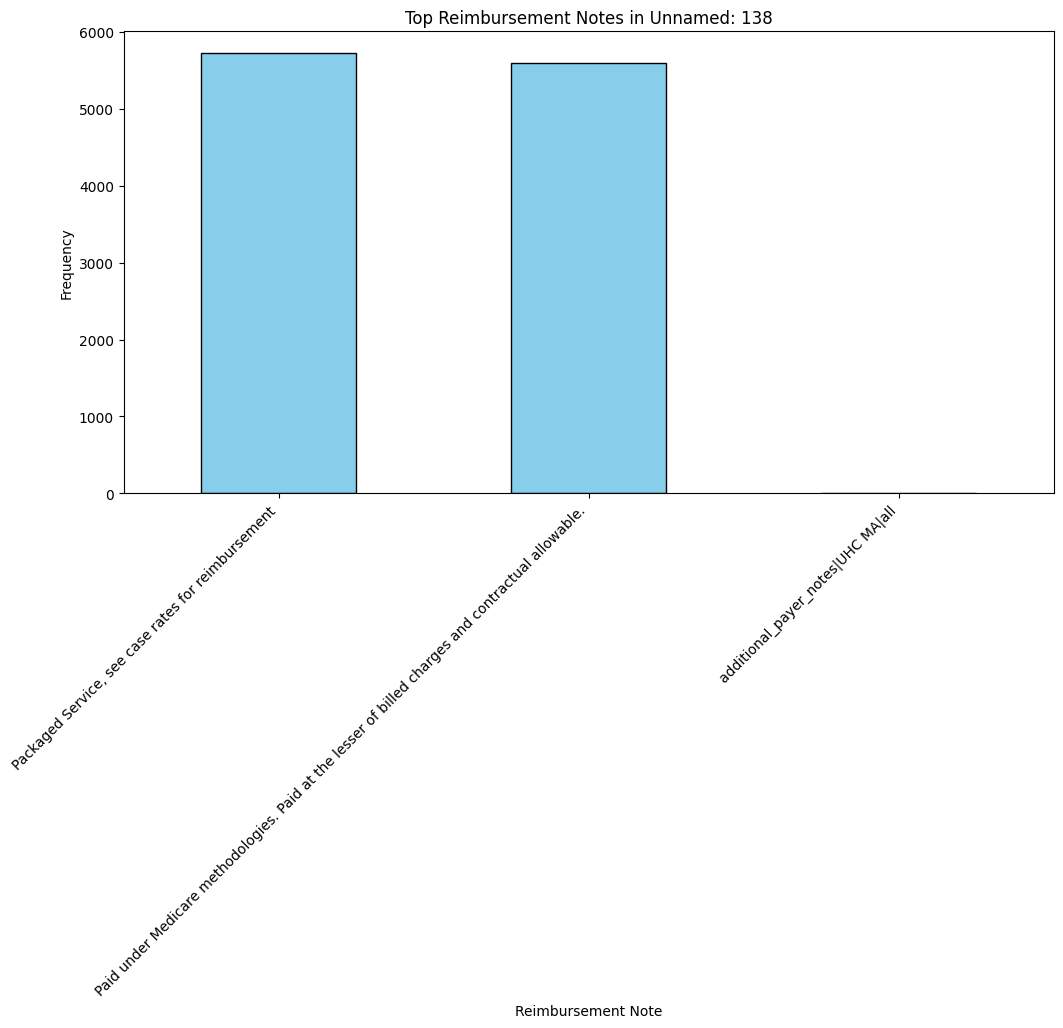

In [64]:
value_counts = data['Unnamed: 138'].value_counts().dropna().head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top Reimbursement Notes in Unnamed: 138")
plt.xlabel("Reimbursement Note")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()












### Observations #2

Below is the bar chart of the top 10 most frequent listed hospitals or services within the column hospital_name in this dataset. From the distribution above, there is a phenomenon that some of these services or hospitals are repetitive compared to the rest. This may imply that either these services or hospitals have to cater to a wide range of treatments or need to take on a high volume of cases.

Therefore, the frequency of listing certain procedures, such as "HEART TRANSPLANT" or "ECMO", would reflect special services provided in those hospitals and thus attract patients with complicated or critical conditions. That would be another trend which might be utilized to indicate the concentration of advanced medical services within certain particular hospitals, possibly useful for understanding how specialized healthcare is available across regions.

This infographic will be very useful for healthcare planners and administrators to present which high-demanding hospitals or services might need more resources or support.

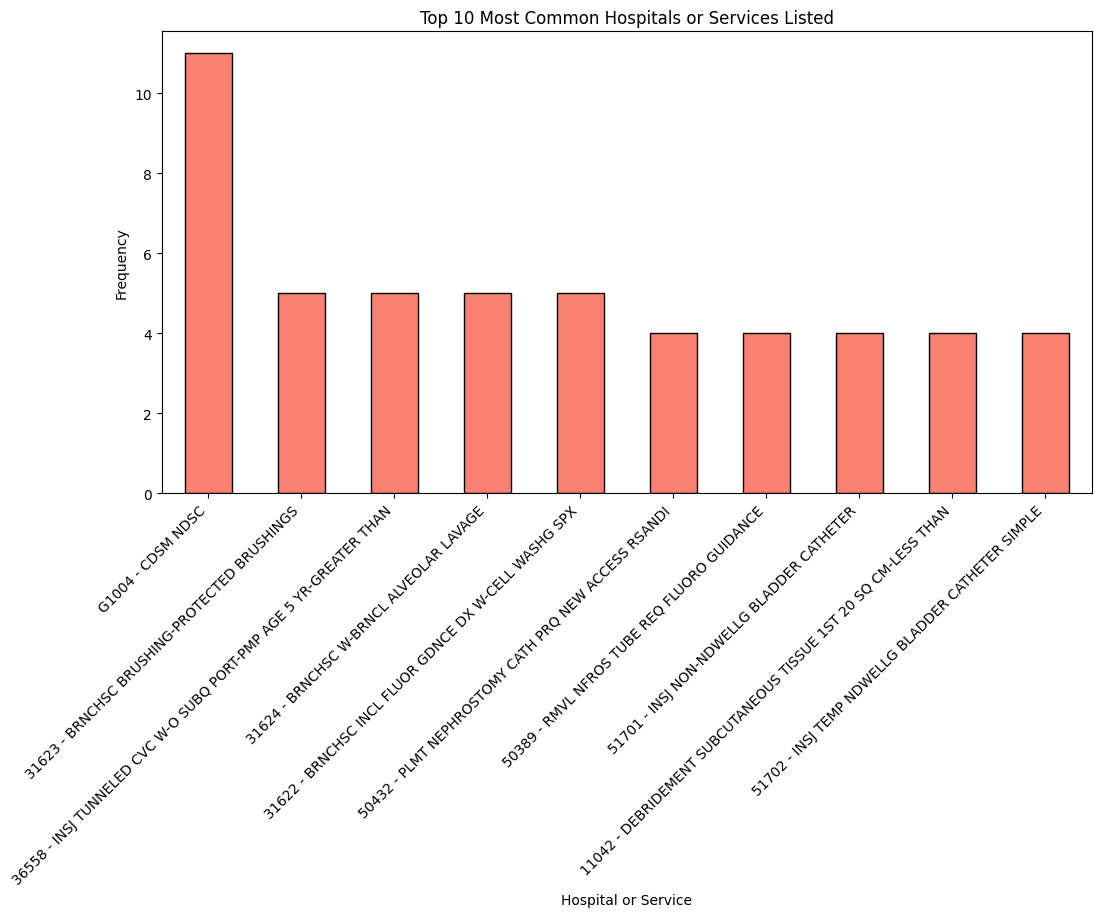

In [65]:
hospital_counts = data['hospital_name'].value_counts().dropna().head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
hospital_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Top 10 Most Common Hospitals or Services Listed")
plt.xlabel("Hospital or Service")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()



---



## Submitting Your Work

As usual, submit your work using the "Save to GitHub" option